# nvImageCodecs examples

In [1]:
import os
import cv2
from matplotlib import pyplot as plt


In [2]:
os.chdir("c:\\Users\\smatysik\\projects\\nvimagecodec\\build\\example\\example_decode\\RelWithDebInfo")
#os.chdir("/mnt/c/Users/smatysik/projects/nvImageCodecsWSL2/build/example/example_decode")


## OpenCV

Load small image with OpenCV

In [3]:
%%time 
cv_img_cat = cv2.imread("cat.j2k")


CPU times: total: 15.6 ms
Wall time: 26.9 ms


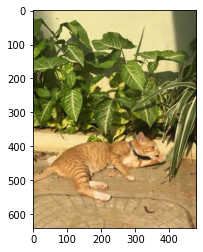

In [4]:
cv_img_cat = cv2.cvtColor(cv_img_cat, cv2.COLOR_BGR2RGB)
plt.imshow(cv_img_cat)

Load 4k image with OpenCV

In [5]:
%%time 
#%%timeit -r 1 -n 10
cv_img_4k = cv2.imread("4k_lossless.jp2")


CPU times: total: 1.41 s
Wall time: 1.43 s


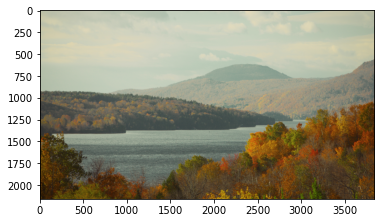

In [6]:
cv_img_4k = cv2.cvtColor(cv_img_4k, cv2.COLOR_BGR2RGB)
plt.imshow(cv_img_4k)


## nvImageCodecs

In [7]:
import nvimgcodecs

Load small Jpeg2000 image with nvImageCodecs

In [8]:
%%time
#%%timeit -r 5 -n 10
nv_img_cat = nvimgcodecs.imread("cat.j2k")


CPU times: total: 141 ms
Wall time: 267 ms


Load 4k Jpeg2000 (in jp2 container) image with nvImageCodecs

In [9]:
%%time
#%%timeit -r 5 -n 10
nv_img4k = nvimgcodecs.imread("4k_lossless.jp2")

CPU times: total: 281 ms
Wall time: 281 ms


Save 4k image to bmp file with nvImageCodecs

In [10]:
%%time
# %%timeit -r 1 -n 10
nvimgcodecs.imwrite("4k_lossless-jp2-o.bmp", nv_img4k)


CPU times: total: 500 ms
Wall time: 511 ms


Read back with OpenCV just saved (with nvImageCodecs) bmp image 

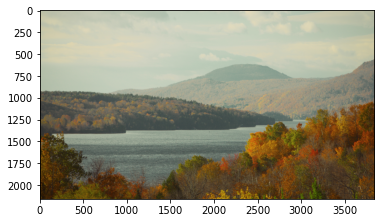

In [11]:
cv_img_4k_bmp = cv2.imread("4k_lossless.bmp")
cv_img_4k_bmp = cv2.cvtColor(cv_img_4k_bmp, cv2.COLOR_BGR2RGB)
plt.imshow(cv_img_4k_bmp)

Save 4k image to jpg file with nvImageCodecs

In [12]:
%%time
#%%timeit -r 1 -n 10
nvimgcodecs.imwrite("4k_lossless-jp2-o.jpg", nv_img4k)


CPU times: total: 62.5 ms
Wall time: 63.3 ms


Read back with OpenCV just save (with nvImageCodecs) bmp image 

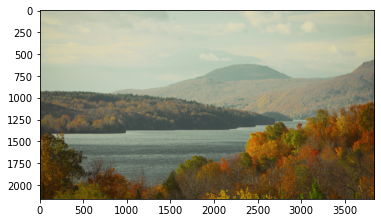

In [13]:
image = cv2.imread("4k_lossless-jp2-o.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Load jpg with nvImageCodecs

In [14]:
%%time
nv_img_jpg = nvimgcodecs.imread("cat_q95_444.jpg")

CPU times: total: 0 ns
Wall time: 9.08 ms


Save as Jpeg 2000 with nvImageCodecs

In [15]:
%%time
# %%timeit -r 1 -n 10
nvimgcodecs.imwrite("cat-jpg-o.j2k", nv_img_jpg)


CPU times: total: 46.9 ms
Wall time: 46 ms


Read back with OpenCV just saved (with nvImageCodecs) j2k image 

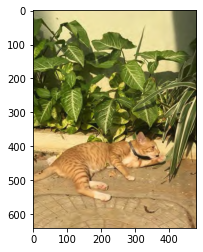

In [16]:
image = cv2.imread("cat-jpg-o.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Passing decoding parameters

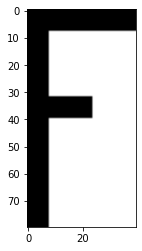

In [17]:
nv_img_jpg = nvimgcodecs.imread("f8-exif.jpg")
nvimgcodecs.imwrite("f8-exif.bmp", nv_img_jpg)
image = cv2.imread("f8-exif.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


Let assume we would like to ignore exif orientation

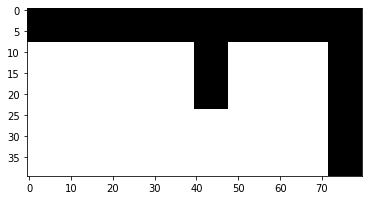

In [18]:
nv_img_jpg = nvimgcodecs.imread(
    "f8-exif.jpg", nvimgcodecs.NVIMGCDCS_IMREAD_IGNORE_ORIENTATION)
nvimgcodecs.imwrite("f8-wo-exif.bmp", nv_img_jpg)
image = cv2.imread("f8-wo-exif.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


### Passing encoding parameters

Changing quality and chroma subsampling in jpeg

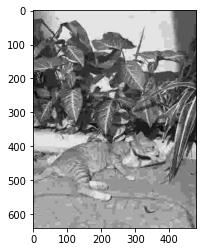

In [19]:
nv_img_jpg = nvimgcodecs.imread("cat_q95_444.jpg")
nvimgcodecs.imwrite("cat-q5-gray.jpg", nv_img_jpg,
                    [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG_QUALITY, 5, 
                     nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG_SAMPLING_FACTOR, nvimgcodecs.NVIMGCDCS_IMWRITE_SAMPLING_FACTOR_GRAY])
image = cv2.imread("cat-q5-gray.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


Encode lossless and lossy with jpeg2000

lossy file size: 1183
lossless file size: 138455
lossless 2 decomposition levels file size: 183742


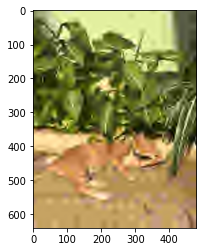

In [20]:
import ctypes
nv_img_jpg = nvimgcodecs.imread("cat_q95_444.jpg")
nvimgcodecs.imwrite("cat-psnr25.j2k", nv_img_jpg, 
                [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_TARGET_PSNR, ctypes.c_uint32.from_buffer(ctypes.c_float(20.90)).value])
nvimgcodecs.imwrite("cat-lossless.j2k", nv_img_jpg,
                    [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_REVERSIBLE])
nvimgcodecs.imwrite("cat-lossless-2decomps.j2k", nv_img_jpg,
                    [nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_REVERSIBLE, nvimgcodecs.NVIMGCDCS_IMWRITE_JPEG2K_NUM_DECOMPS, 2])
print("lossy file size:", os.path.getsize("cat-psnr25.j2k"))
print("lossless file size:", os.path.getsize("cat-lossless.j2k"))
print("lossless 2 decomposition levels file size:",
      os.path.getsize("cat-lossless-2decomps.j2k"))
image = cv2.imread("cat-psnr10.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### nvImageCodes Image  __cuda_array_interface__ support

In [21]:
print(nv_img4k.__cuda_array_interface__)
print(nv_img4k.shape)


{'shape': (3, 2160, 3840), 'strides': (8847360, 4096, 1), 'typestr': '=B', 'data': (34407972864, False), 'version': 2}
(3, 2160, 3840)
